In [1]:
import pandas as pd

# Load the dataset
file_path = 'KaggleV2-May-2016.csv'
data = pd.read_csv(file_path)

# Display the first few rows to inspect the dataset structure
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
# # Convert ScheduledDay and AppointmentDay to datetime
# data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
# # data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
# data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).apply(lambda x: x.date())

# Convert datetime columns to timezone-naive
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.tz_localize(None)
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.tz_localize(None)

# Create new features from datetime columns
data['ScheduledDayOfWeek'] = data['ScheduledDay'].dt.dayofweek
data['AppointmentDayOfWeek'] = data['AppointmentDay'].dt.dayofweek
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Drop original datetime columns (if not needed further)
data.drop(columns=['ScheduledDay', 'AppointmentDay'], inplace=True)

# Encode categorical variables
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})

# Proceed with the rest of the preprocessing

# Check for null values
null_counts = data.isnull().sum()

# Convert No-show to binary (Yes=1, No=0)
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})

# # Encode Gender as binary (F=0, M=1)
# data['Gender'] = data['Gender'].map({0: 'F', 1: "M"})

# Summary of preprocessing steps applied
{
    "Null values per column": null_counts.to_dict(),
    "Unique values in No-show": data['No-show'].unique(),
    "Unique values in Gender": data['Gender'].unique(),
}


{'Null values per column': {'PatientId': 0,
  'AppointmentID': 0,
  'Gender': 0,
  'Age': 0,
  'Neighbourhood': 0,
  'Scholarship': 0,
  'Hipertension': 0,
  'Diabetes': 0,
  'Alcoholism': 0,
  'Handcap': 0,
  'SMS_received': 0,
  'No-show': 0,
  'ScheduledDayOfWeek': 0,
  'AppointmentDayOfWeek': 0,
  'DaysBetween': 0},
 'Unique values in No-show': array([0, 1], dtype=int64),
 'Unique values in Gender': array([0, 1], dtype=int64)}

In [5]:
# Encode Neighbourhood using one-hot encoding
neighbourhood_encoded = pd.get_dummies(data['Neighbourhood'], prefix='Neighbourhood')

# Combine the encoded neighbourhood with the main dataset and drop the original column
data = pd.concat([data, neighbourhood_encoded], axis=1).drop(columns=['Neighbourhood'])

# Display the dataset structure after encoding
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 95 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   PatientId                                  110527 non-null  float64
 1   AppointmentID                              110527 non-null  int64  
 2   Gender                                     110527 non-null  int64  
 3   Age                                        110527 non-null  int64  
 4   Scholarship                                110527 non-null  int64  
 5   Hipertension                               110527 non-null  int64  
 6   Diabetes                                   110527 non-null  int64  
 7   Alcoholism                                 110527 non-null  int64  
 8   Handcap                                    110527 non-null  int64  
 9   SMS_received                               110527 non-null  int64  
 10  No-show 

In [ ]:
!pip install shap

In [ ]:
!pip install fairlearn==0.6.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.4 MB/s eta 0:00:00


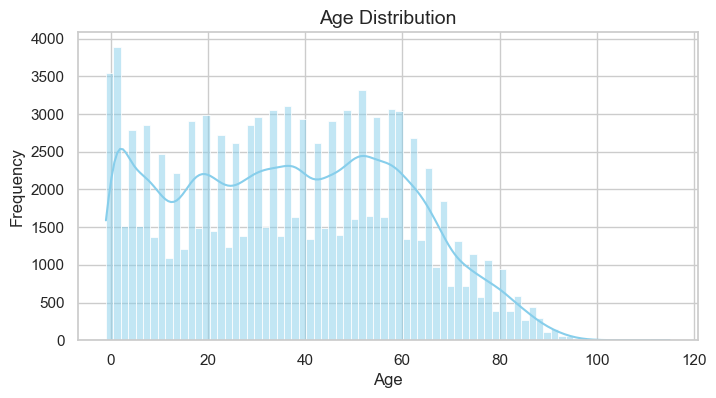

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11144\3775429873.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='viridis')


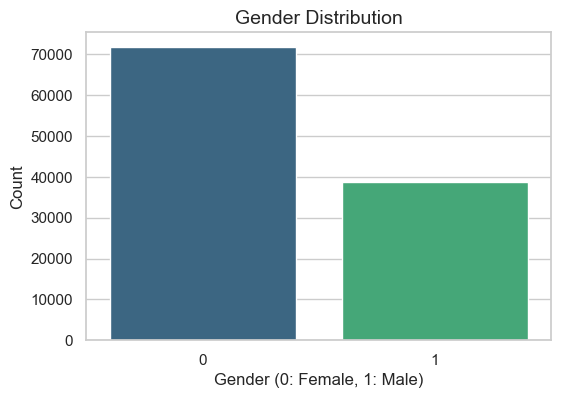

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11144\3775429873.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='No-show', palette='magma')


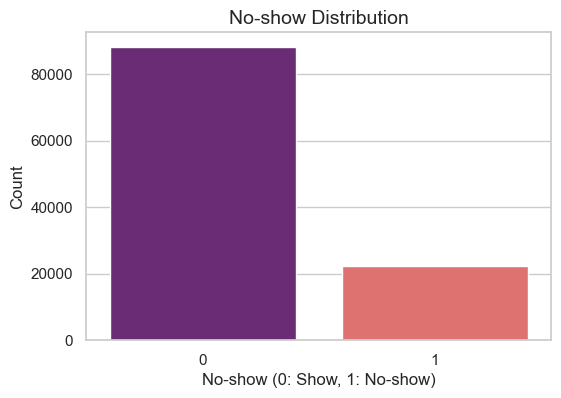

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11144\3775429873.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='No-show', y='Age', palette='coolwarm')


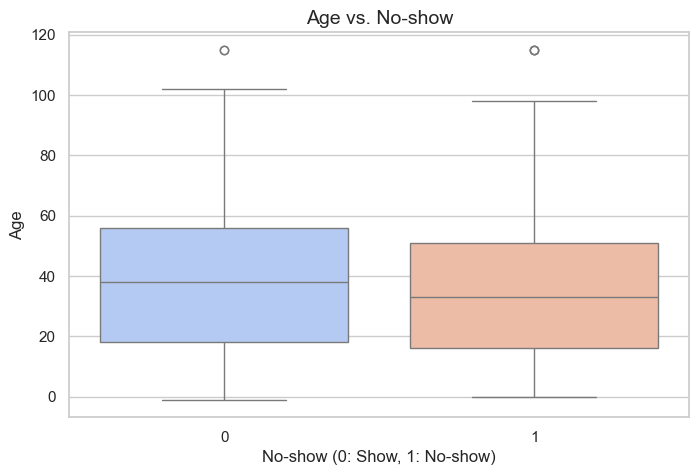

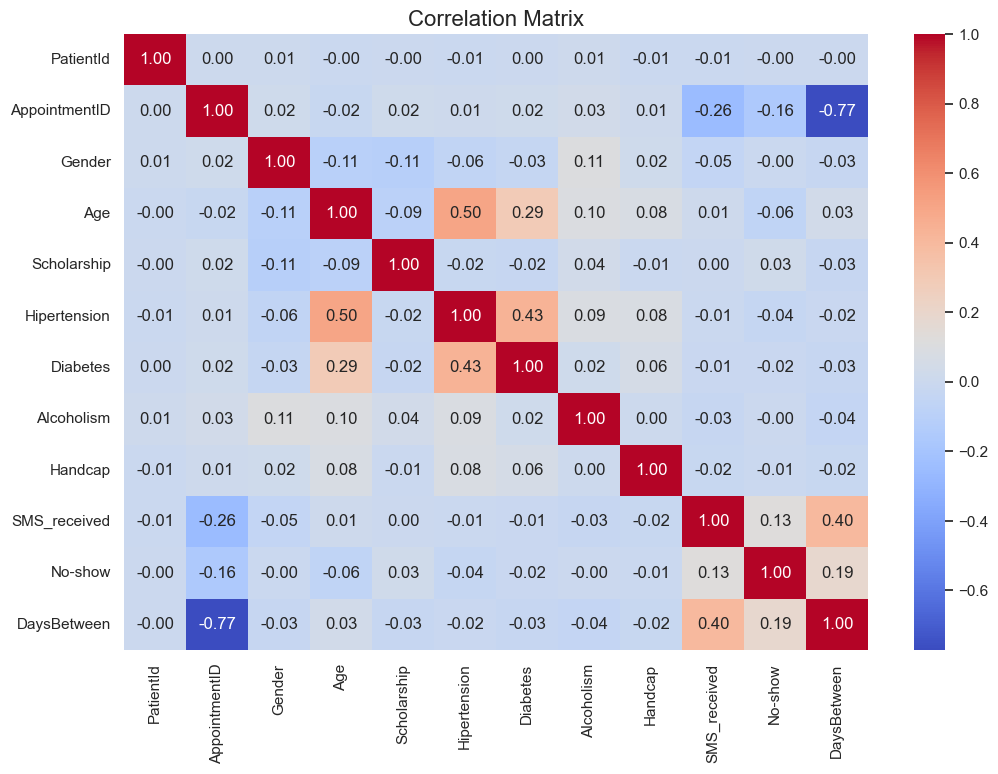

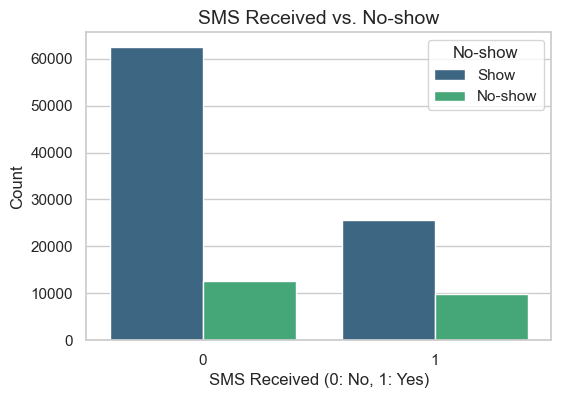

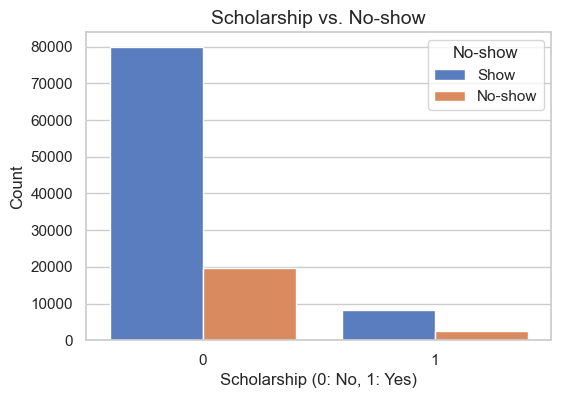

           count       mean        std  min   25%   50%   75%    max
No-show                                                             
0        88208.0  37.790064  23.338878 -1.0  18.0  38.0  56.0  115.0
1        22319.0  34.317667  21.965941  0.0  16.0  33.0  51.0  115.0
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     17669
           1       0.58      0.14      0.23      4437

    accuracy                           0.81     22106
   macro avg       0.70      0.56      0.56     22106
weighted avg       0.77      0.81      0.76     22106

Accuracy: 0.81
ROC AUC Score: 0.75


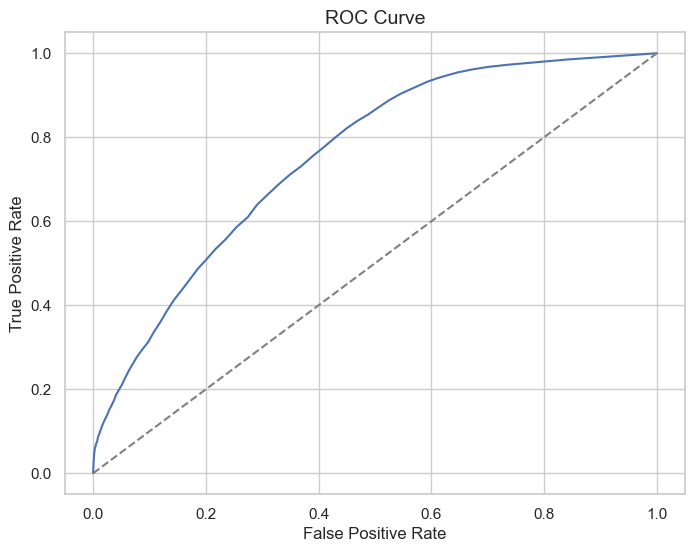

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import numpy as np
import shap
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, false_negative_rate
from fairlearn.reductions import GridSearch, DemographicParity
from fairlearn.widget import FairlearnDashboard

# Set a general style for the plots
sns.set(style="whitegrid")

# Function to plot distributions
def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, color="skyblue")
    plt.title(title, fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

# 1. Distribution of Age
plot_distribution("Age", "Age Distribution")

# 2. Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', palette='viridis')
plt.title("Gender Distribution", fontsize=14)
plt.xlabel("Gender (0: Female, 1: Male)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 3. Distribution of No-show
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='No-show', palette='magma')
plt.title("No-show Distribution", fontsize=14)
plt.xlabel("No-show (0: Show, 1: No-show)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 4. Relationship between Age and No-show
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='No-show', y='Age', palette='coolwarm')
plt.title("Age vs. No-show", fontsize=14)
plt.xlabel("No-show (0: Show, 1: No-show)", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

# 5. Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# 6. SMS_received vs. No-show
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='SMS_received', hue='No-show', palette='viridis')
plt.title("SMS Received vs. No-show", fontsize=14)
plt.xlabel("SMS Received (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="No-show", labels=["Show", "No-show"])
plt.show()

# 7. Scholarship vs. No-show
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Scholarship', hue='No-show', palette='muted')
plt.title("Scholarship vs. No-show", fontsize=14)
plt.xlabel("Scholarship (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="No-show", labels=["Show", "No-show"])
plt.show()

# 8. Additional statistics for Age grouped by No-show
age_stats = data.groupby('No-show')['Age'].describe()
print(age_stats)

# Preprocessing for Machine Learning
# Splitting the dataset into features and target
X = data.drop(columns=['No-show'])
y = data['No-show']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training - Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
#plt.legend()
plt.show()



In [ ]:
# SHAP values for interpretability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Fairness Metrics
metric_frame = MetricFrame(
    metrics={"accuracy": accuracy_score, "selection_rate": selection_rate},
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=data.loc[y_test.index, 'Gender']
)
print("Fairness Metrics:")
print(metric_frame.by_group)

# Fairlearn Dashboard
FairlearnDashboard(
    sensitive_features=data.loc[y_test.index, 'Gender'],
    y_true=y_test,
    y_pred=y_pred
)


In [ ]:
def selection_rate(y_pred):
    return sum(y_pred) / len(y_pred)

def false_positive_rate(y_true, y_pred):
    return sum((y_pred == 1) & (y_true == 0)) / sum(y_true == 0)

def false_negative_rate(y_true, y_pred):
    return sum((y_pred == 0) & (y_true == 1)) / sum(y_true == 1)


In [ ]:
from sklearn.metrics import accuracy_score

# Example of manual fairness metric calculation
def fairness_metrics(y_true, y_pred, sensitive_features):
    groups = np.unique(sensitive_features)
    metrics = {}
    for group in groups:
        group_indices = sensitive_features == group
        metrics[group] = accuracy_score(y_true[group_indices], y_pred[group_indices])
    return metrics

fairness_results = fairness_metrics(
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=data.loc[y_test.index, 'Gender']
)
print(f"Fairness Metrics by Group: {fairness_results}")
